In [1]:
import os
import numpy as np
import pandas as pd
#pd.options.plotting.backend = "plotly"
import plotly.express as px
import math
import base64


# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Advanced plotting functionality with seaborn
import seaborn as sns

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

In [33]:
#Opening, reading, dropping column and changing 'percent_change' number to float in .csv
with open('data/geo_mobility_ed_attainment.csv') as f:
    geo_mobility_ed_attainment = pd.read_csv(f).drop(columns=['move_same_county', 'city_state'])
    #geo_mobility_ed_attainment['__'] = pd.to_numeric(business_dynamics['percent_change'],errors = 'coerce')
geo_mob_ed_attn = geo_mobility_ed_attainment
geo_mob_ed_attn

,name,year,move_total_year,move_diff_county,move_diff_state,move_from_abroad,total_ed_attn_pop_25up,total_ed_attn_less_than_high,total_ed_attn_high,total_ed_attn_some_coll_assoc,...,diff_state_ed_attn_high,diff_state_ed_attn_some_coll_assoc,diff_state_ed_attn_bach,diff_state_ed_attn_grad,from_abroad_ed_attn_pop_25up,from_abroad_ed_attn_less_than_high,from_abroad_ed_attn_high,from_abroad_ed_some_coll_assoc,from_abroad_ed_bach,from_abroad_ed_grad
0,Albuquerque,2010,540574,2.0,3.4,0.4,358566,44850,80825,118044,...,2.2,3.7,4.3,4.8,0.4,0.1,0.0,0.3,1.1,0.6
1,Albuquerque,2011,544579,2.7,2.9,0.5,364719,39026,85725,119843,...,3.0,1.8,5.6,3.9,0.4,0.1,0.3,0.3,1.2,0.4
2,Albuquerque,2012,548340,2.4,3.0,0.8,365790,39139,85304,117976,...,2.8,2.1,4.3,4.1,0.8,0.9,0.6,0.2,1.7,1.1
3,Albuquerque,2013,549629,2.0,2.6,0.6,371166,40030,86473,117832,...,2.5,2.2,4.8,4.3,0.6,0.6,0.7,0.5,0.6,0.5
4,Albuquerque,2014,550317,3.1,2.8,0.2,372538,39612,87608,120485,...,1.1,2.1,2.3,5.9,0.2,0.2,0.2,0.1,0.2,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Washington,2015,663006,0.0,9.0,1.6,472884,48249,82181,74109,...,3.3,5.8,9.2,8.7,1.6,0.3,1.0,0.8,1.7,2.7
266,Washington,2016,672022,0.0,8.7,1.7,480158,45743,85248,76292,...,3.7,3.1,9.3,8.2,1.5,0.3,0.7,0.6,2.3,2.1
267,Washington,2017,684810,0.0,8.2,1.5,494614,48331,85033,77731,...,2.4,4.1,8.4,9.7,1.4,0.9,0.4,0.7,1.6,2.3
268,Washington,2018,693798,0.0,6.9,1.4,500176,39628,82900,75478,...,1.7,3.4,8.2,7.4,1.1,1.3,0.7,0.6,1.1,1.6


In [34]:
geo_mob_ed_attn.columns

Index(['name', 'year', 'move_total_year', 'move_diff_county',
       'move_diff_state', 'move_from_abroad', 'total_ed_attn_pop_25up',
       'total_ed_attn_less_than_high', 'total_ed_attn_high',
       'total_ed_attn_some_coll_assoc', 'total_ed_attn_bach',
       'total_ed_attn_grad', 'diff_county_ed_attn_pop_25up',
       'diff_county_ed_attn_less_than_high', 'diff_county_ed_attn_high',
       'diff_county_ed_attn_some coll_assoc', 'diff_county_ed_attn_bach',
       'diff_county_ed_attn_grad', 'diff_state_ed_attn_pop_25up',
       'diff_state_ed_attn_less_than_high', 'diff_state_ed_attn_high',
       'diff_state_ed_attn_some_coll_assoc', 'diff_state_ed_attn_bach',
       'diff_state_ed_attn_grad', 'from_abroad_ed_attn_pop_25up',
       'from_abroad_ed_attn_less_than_high', 'from_abroad_ed_attn_high',
       'from_abroad_ed_some_coll_assoc', 'from_abroad_ed_bach',
       'from_abroad_ed_grad'],
      dtype='object')

In [35]:
geo_mob_ed_attn['total_ed_pop_25up'] = geo_mob_ed_attn['diff_county_ed_attn_pop_25up'] + geo_mob_ed_attn['diff_state_ed_attn_pop_25up'] +geo_mob_ed_attn['from_abroad_ed_attn_pop_25up']
geo_mob_ed_attn['total_ed_less_than_high'] = geo_mob_ed_attn['diff_county_ed_attn_less_than_high'] + geo_mob_ed_attn['diff_state_ed_attn_less_than_high'] +geo_mob_ed_attn['from_abroad_ed_attn_less_than_high']
geo_mob_ed_attn['total_ed_high'] = geo_mob_ed_attn['diff_county_ed_attn_high'] + geo_mob_ed_attn['diff_state_ed_attn_high'] +geo_mob_ed_attn['from_abroad_ed_attn_high']

geo_mob_ed_attn['total_ed_some_c_assoc'] = geo_mob_ed_attn['diff_county_ed_attn_some coll_assoc'] + geo_mob_ed_attn['diff_state_ed_attn_some_coll_assoc'] +geo_mob_ed_attn['from_abroad_ed_some_coll_assoc']

geo_mob_ed_attn['total_ed_bach'] = geo_mob_ed_attn['diff_county_ed_attn_bach'] + geo_mob_ed_attn['diff_state_ed_attn_bach'] +geo_mob_ed_attn['from_abroad_ed_bach']
geo_mob_ed_attn['total_ed_grad'] = geo_mob_ed_attn['diff_county_ed_attn_grad'] + geo_mob_ed_attn['diff_state_ed_attn_grad'] +geo_mob_ed_attn['from_abroad_ed_grad']
#geo_mob_ed_attn['total_mobility'] = geo_mob_ed_attn['move_diff_county'] + geo_mob_ed_attn['move_diff_state'] + geo_mob_ed_attn['move_from_abroad']
#geo_mob_ed_attn = geo_mob_ed_attn.drop(column='total_mobility')
geo_mob_ed_attn

,name,year,move_total_year,move_diff_county,move_diff_state,move_from_abroad,total_ed_attn_pop_25up,total_ed_attn_less_than_high,total_ed_attn_high,total_ed_attn_some_coll_assoc,...,from_abroad_ed_attn_high,from_abroad_ed_some_coll_assoc,from_abroad_ed_bach,from_abroad_ed_grad,total_ed_pop_25up,total_ed_less_than_high,total_ed_high,total_ed_some_c_assoc,total_ed_bach,total_ed_grad
0,Albuquerque,2010,540574,2.0,3.4,0.4,358566,44850,80825,118044,...,0.0,0.3,1.1,0.6,5.3,2.8,3.6,5.9,7.2,6.2
1,Albuquerque,2011,544579,2.7,2.9,0.5,364719,39026,85725,119843,...,0.3,0.3,1.2,0.4,5.6,3.6,5.9,4.6,8.5,5.4
2,Albuquerque,2012,548340,2.4,3.0,0.8,365790,39139,85304,117976,...,0.6,0.2,1.7,1.1,5.6,2.4,5.0,5.4,7.5,6.8
3,Albuquerque,2013,549629,2.0,2.6,0.6,371166,40030,86473,117832,...,0.7,0.5,0.6,0.5,5.1,2.1,4.8,4.4,6.6,7.0
4,Albuquerque,2014,550317,3.1,2.8,0.2,372538,39612,87608,120485,...,0.2,0.1,0.2,0.3,5.0,5.4,3.8,4.4,5.5,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Washington,2015,663006,0.0,9.0,1.6,472884,48249,82181,74109,...,1.0,0.8,1.7,2.7,8.3,1.9,4.3,6.6,10.9,11.4
266,Washington,2016,672022,0.0,8.7,1.7,480158,45743,85248,76292,...,0.7,0.6,2.3,2.1,7.9,3.2,4.4,3.7,11.6,10.3
267,Washington,2017,684810,0.0,8.2,1.5,494614,48331,85033,77731,...,0.4,0.7,1.6,2.3,7.9,3.2,2.8,4.8,10.0,12.0
268,Washington,2018,693798,0.0,6.9,1.4,500176,39628,82900,75478,...,0.7,0.6,1.1,1.6,6.6,1.9,2.4,4.0,9.3,9.0


In [36]:
geo_mob_ed_attn = pd.melt(geo_mob_ed_attn, id_vars=['name', 'year'], value_vars=['total_ed_pop_25up', 'total_ed_less_than_high', 'total_ed_high', 'total_ed_bach', 'total_ed_grad', 'total_ed_some_c_assoc'])
geo_mob_ed_attn

,name,year,variable,value
0,Albuquerque,2010,total_ed_pop_25up,5.3
1,Albuquerque,2011,total_ed_pop_25up,5.6
2,Albuquerque,2012,total_ed_pop_25up,5.6
3,Albuquerque,2013,total_ed_pop_25up,5.1
4,Albuquerque,2014,total_ed_pop_25up,5.0
...,...,...,...,...
1615,Washington,2015,total_ed_some_c_assoc,6.6
1616,Washington,2016,total_ed_some_c_assoc,3.7
1617,Washington,2017,total_ed_some_c_assoc,4.8
1618,Washington,2018,total_ed_some_c_assoc,4.0


In [37]:
geo_mob_ed_attn_10 = geo_mob_ed_attn[(geo_mob_ed_attn.values  == 'Austin')|(geo_mob_ed_attn.values  == 'Boston')|(geo_mob_ed_attn.values  == 'Denver')|(geo_mob_ed_attn.values  == 'Detroit')|(geo_mob_ed_attn.values  == 'Fresno')|(geo_mob_ed_attn.values  == 'Louisville')|(geo_mob_ed_attn.values  == 'Memphis')|(geo_mob_ed_attn.values  == 'Milwaukee')|(geo_mob_ed_attn.values  == 'Seattle')|(geo_mob_ed_attn.values  == 'Washington')]
geo_mob_ed_attn_10

,name,year,variable,value
10,Austin,2010,total_ed_pop_25up,8.0
11,Austin,2011,total_ed_pop_25up,8.5
12,Austin,2012,total_ed_pop_25up,8.6
13,Austin,2013,total_ed_pop_25up,8.2
14,Austin,2014,total_ed_pop_25up,9.3
...,...,...,...,...
1615,Washington,2015,total_ed_some_c_assoc,6.6
1616,Washington,2016,total_ed_some_c_assoc,3.7
1617,Washington,2017,total_ed_some_c_assoc,4.8
1618,Washington,2018,total_ed_some_c_assoc,4.0


In [38]:
geo_mob_ed_attn_top = geo_mob_ed_attn_10[(geo_mob_ed_attn_10.values  == 'Austin')|(geo_mob_ed_attn_10.values  == 'Boston')|(geo_mob_ed_attn_10.values  == 'Denver')|(geo_mob_ed_attn_10.values  == 'Seattle')|(geo_mob_ed_attn_10.values  == 'Washington')]
geo_mob_ed_attn_top

,name,year,variable,value
10,Austin,2010,total_ed_pop_25up,8.0
11,Austin,2011,total_ed_pop_25up,8.5
12,Austin,2012,total_ed_pop_25up,8.6
13,Austin,2013,total_ed_pop_25up,8.2
14,Austin,2014,total_ed_pop_25up,9.3
...,...,...,...,...
1615,Washington,2015,total_ed_some_c_assoc,6.6
1616,Washington,2016,total_ed_some_c_assoc,3.7
1617,Washington,2017,total_ed_some_c_assoc,4.8
1618,Washington,2018,total_ed_some_c_assoc,4.0


In [39]:
geo_mob_ed_attn_bottom = geo_mob_ed_attn_10[(geo_mob_ed_attn_10.values  == 'Milwaukee')|(geo_mob_ed_attn_10.values  == 'Louisville')|(geo_mob_ed_attn_10.values  == 'Detroit')|(geo_mob_ed_attn_10.values  == 'Memphis')|(geo_mob_ed_attn_10.values  == 'Fresno')]
geo_mob_ed_attn_bottom

,name,year,variable,value
70,Detroit,2010,total_ed_pop_25up,2.4
71,Detroit,2011,total_ed_pop_25up,2.8
72,Detroit,2012,total_ed_pop_25up,2.5
73,Detroit,2013,total_ed_pop_25up,2.9
74,Detroit,2014,total_ed_pop_25up,3.2
...,...,...,...,...
1535,Milwaukee,2015,total_ed_some_c_assoc,3.7
1536,Milwaukee,2016,total_ed_some_c_assoc,3.0
1537,Milwaukee,2017,total_ed_some_c_assoc,3.3
1538,Milwaukee,2018,total_ed_some_c_assoc,2.9


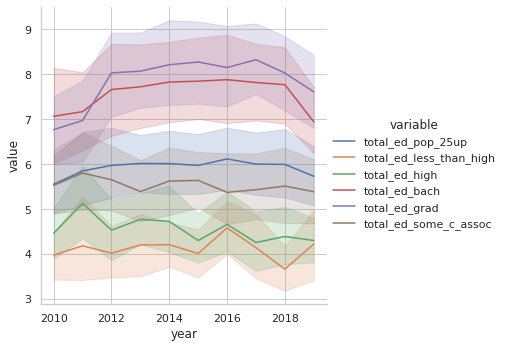

In [40]:
geo_mob_ed_attn_all_line = sns.relplot(x='year', y='value', hue='variable',kind='line',data=geo_mob_ed_attn)


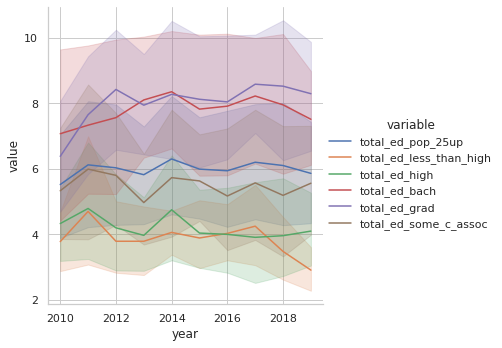

In [41]:
geo_mob_ed_attn_10_line = sns.relplot(x='year', y='value', hue='variable',kind='line',data=geo_mob_ed_attn_10)


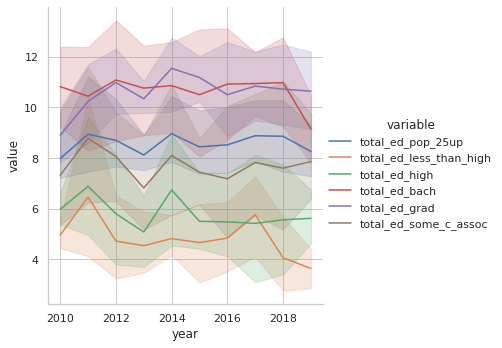

In [42]:
geo_mob_ed_attn_top_line = sns.relplot(x='year', y='value', hue='variable',kind='line',data=geo_mob_ed_attn_top)

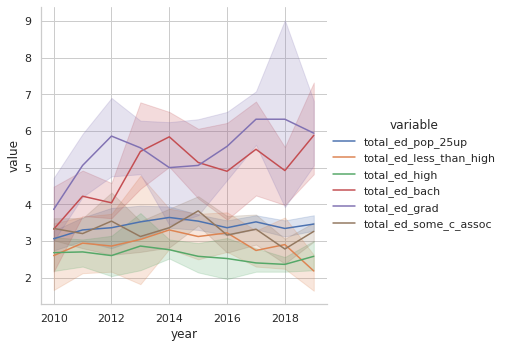

In [43]:
geo_mob_ed_attn_bottom_line = sns.relplot(x='year', y='value', hue='variable',kind='line',data=geo_mob_ed_attn_bottom)

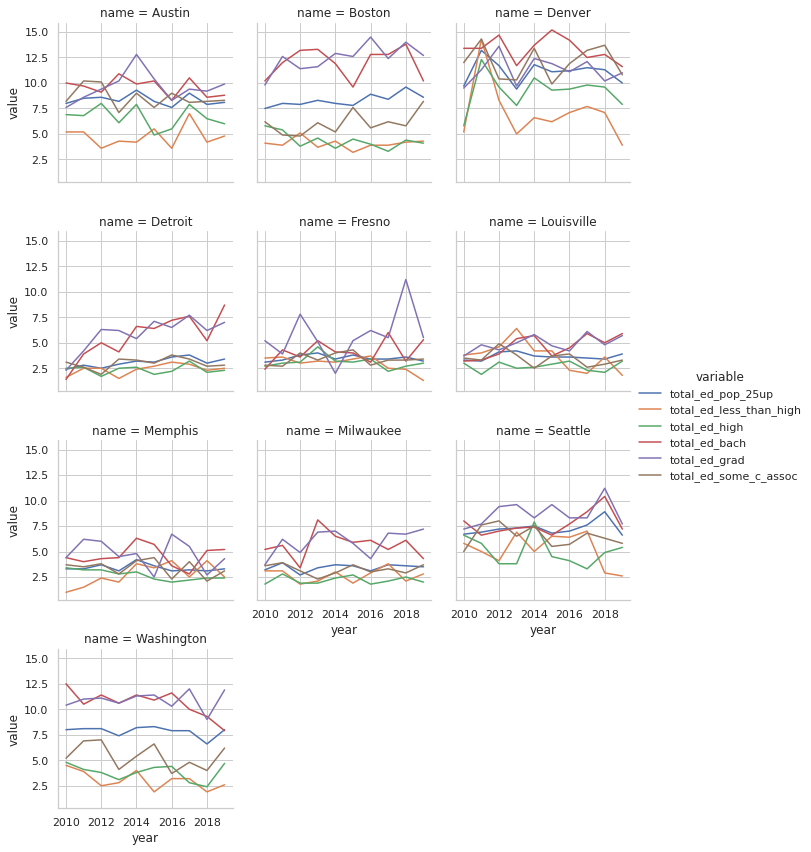

In [44]:
geo_mob_ed_attn_10_map = sns.FacetGrid(geo_mob_ed_attn_10, col='name', hue = 'variable', col_wrap = 3,)
geo_mob_ed_attn_10_map.map_dataframe(sns.lineplot,x='year', y='value')
geo_mob_ed_attn_10_map.add_legend()


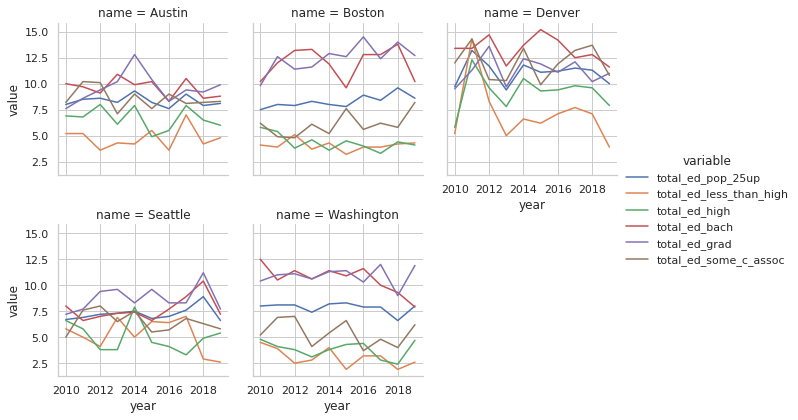

In [45]:
geo_mob_ed_attn_top_map = sns.FacetGrid(geo_mob_ed_attn_top, col='name', hue = 'variable', col_wrap = 3,)
geo_mob_ed_attn_top_map.map_dataframe(sns.lineplot,x='year', y='value')
geo_mob_ed_attn_top_map.add_legend()

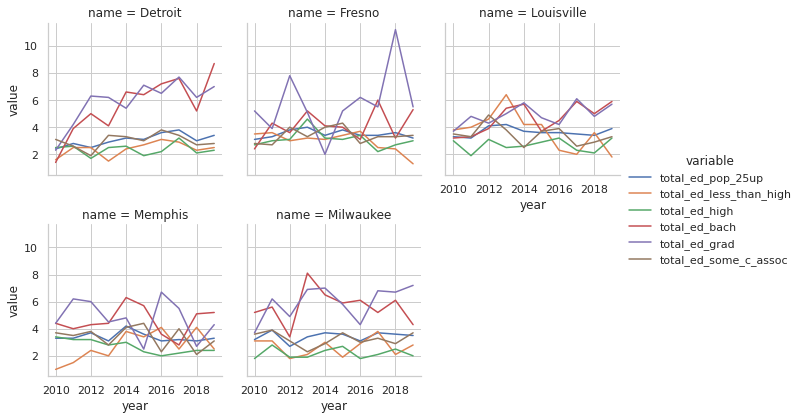

In [46]:
geo_mob_ed_attn_bottom_map = sns.FacetGrid(geo_mob_ed_attn_bottom, col='name', hue = 'variable', col_wrap = 3,)
geo_mob_ed_attn_bottom_map.map_dataframe(sns.lineplot,x='year', y='value')
geo_mob_ed_attn_bottom_map.add_legend()

In [1]:
df.to_csv('data/geo_mob_ed_attn.csv', index=False)

NameError: name 'df' is not defined